In [121]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [114]:
img=cv2.imread("shape2.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, 1, (0,255,0), 3) ## Drawing the outer hollow shape for the X coordinate
cv2.drawContours(img, contours, 3, (0,255,0), 3) ## Drawing the inner solid shape for Y coordinate 

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

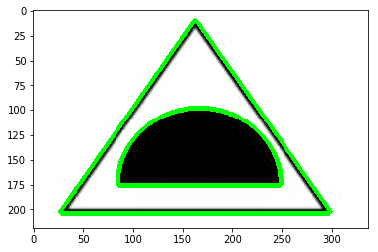

In [123]:
plt.imshow(img)
plt.show()


In [125]:
class detectshape:
    def __init__(self):
        pass        
    def shape(self,cnt):
        peri=cv2.arcLength(cnt, True)
        
        approx = cv2.approxPolyDP(cnt, 0.04 * peri, True)
        if len(approx)==3: ## Its a triangle
            coord=2
        elif len(approx)==4:
            (x, y, w, h) = cv2.boundingRect(approx)
            ar = w / float(h)            
            if ar>0.95 and ar<=1.35: ## square should fall within these conditions
                coord=3 ## value for square
            else:
                coord=4 ## value for rectangle
        elif len(approx)==5: ## semi circle has len(approx) of 5
            coord=1
        else:  ## if all conditions fail then it is a circle
            coord=0
        return coord    

In [117]:
s=detectshape()

In [118]:
(x,y)=(s.shape(contours[1]),s.shape(contours[3])) ## passing the 

In [120]:
(x,y) ## the coordinate values

(2, 1)